# Data preparation

<IPython.core.display.Javascript object>


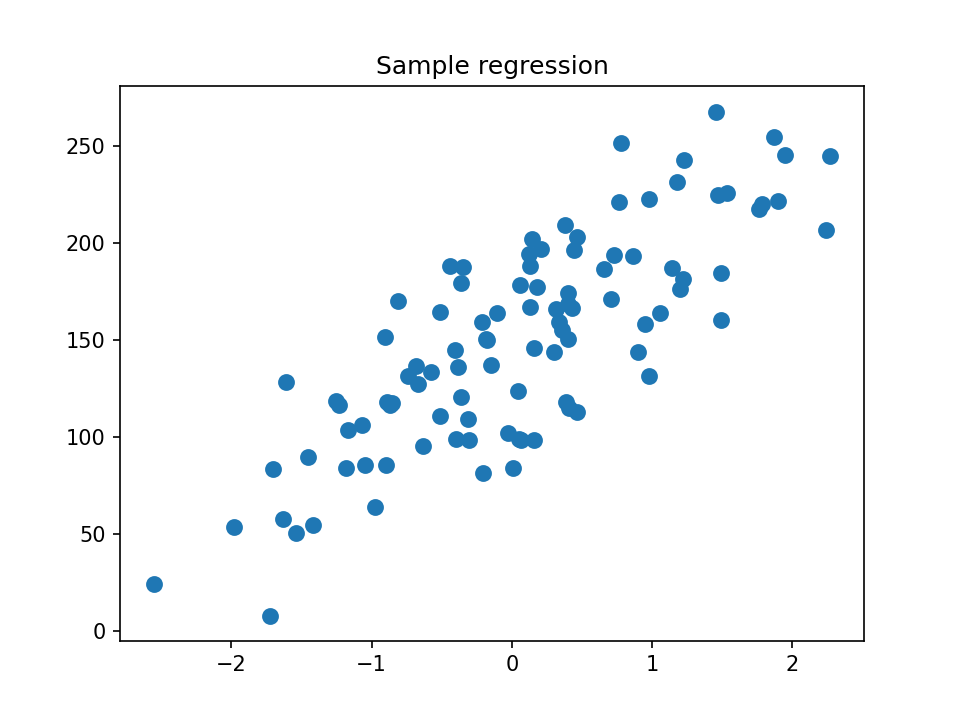

In [9]:
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

np.set_printoptions(precision = 2)

from sklearn.datasets import make_regression
plt.figure()
plt.title('Sample regression')
X_R1, y_R1 = make_regression(n_samples = 100, n_features = 1, n_informative = 1, bias = 150.0, noise = 30, random_state = 0)

plt.scatter(X_R1, y_R1, marker = 'o', s = 50)
plt.show()

In [3]:
#for classification
fruits = pd.read_table('fruit_data_with_colors.txt')

X_fruits = fruits[['height', 'width', 'mass', 'color_score']]
y_fruits = fruits['fruit_label']

X_fruits_2d = fruits[['height', 'width']]
y_fruits_2d = fruits['fruit_label']

#for evaluation
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

# Linear Regression

In [13]:
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1, random_state = 0)
linreg = LinearRegression().fit(X_train, y_train)

print('linear model coeff(w): {}'.format(linreg.coef_))
#y절편 구하기
print('linear model intercept(b): {:.2f}'.format(linreg.intercept_))
#스코어
print('R-squared score (training): {:.3f}'.format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'.format(linreg.score(X_test, y_test)))

linear model coeff(w): [45.71]
linear model intercept(b): 148.45
R-squared score (training): 0.679
R-squared score (test): 0.492


<IPython.core.display.Javascript object>


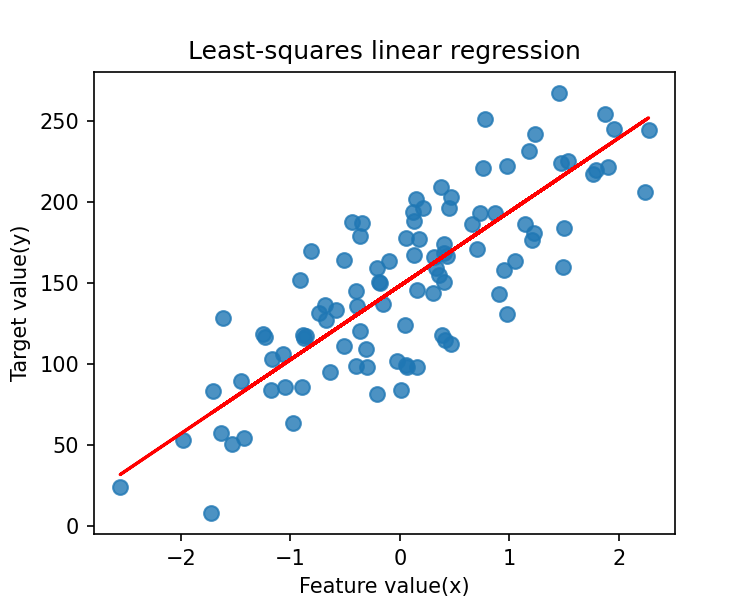

In [14]:
plt.figure(figsize = (5, 4))
plt.scatter(X_R1, y_R1, marker = 'o', s = 50, alpha = 0.8)
plt.plot(X_R1, linreg.coef_ * X_R1 + linreg.intercept_, 'r-')
plt.title('Least-squares linear regression')
plt.xlabel('Feature value(x)')
plt.ylabel('Target value(y)')
plt.show()

# Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression

#yfruitsapple 은 yrruits2d가 1이냐 아니냐를 가지고 만든다
y_fruits_apple = y_fruits_2d == 1
X_train, X_test, y_train, y_test = train_test_split(X_fruits_2d, y_fruits_apple, random_state = 0)

clf = LogisticRegression().fit(X_train, y_train)

print('Accuracy of Logistic regression classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.75
Accuracy of Logistic regression classifier on test set: 0.67


In [18]:
clf.predict([[6, 8]])    #true면 애플

array([ True])

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)

clf = LogisticRegression().fit(X_train, y_train)

print('Accuracy of Logistic regression classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.95
Accuracy of Logistic regression classifier on test set: 0.94


C:\Users\Eunchae\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Support Vector Machine

In [20]:
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(X_fruits_2d, y_fruits_apple, random_state = 0)

clf = SVC(kernel = 'linear').fit(X_train, y_train)

print('Accuracy of Logistic regression classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.84
Accuracy of Logistic regression classifier on test set: 0.67


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)

clf = SVC(kernel = 'linear').fit(X_train, y_train)

print('Accuracy of Logistic regression classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.97
Accuracy of Logistic regression classifier on test set: 0.96


# Decision Tree

In [22]:
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(X_fruits_2d, y_fruits_apple, random_state = 0)

clf = DecisionTreeClassifier().fit(X_train, y_train)

print('Accuracy of Logistic regression classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 1.00
Accuracy of Logistic regression classifier on test set: 0.67


In [23]:
#디시전트리는 테스트셋에 대해 오버핏팅의 문제가 발생한다는 결과
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)

clf = DecisionTreeClassifier().fit(X_train, y_train)

print('Accuracy of Logistic regression classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 1.00
Accuracy of Logistic regression classifier on test set: 0.89


# Random Forest

In [26]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X_fruits_2d, y_fruits_apple, random_state = 0)

clf = RandomForestClassifier(n_estimators = 10, random_state = 0).fit(X_train, y_train)

print('Accuracy of Logistic regression classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 1.00
Accuracy of Logistic regression classifier on test set: 0.67


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)

clf = RandomForestClassifier(max_features = 8, n_estimators = 10, random_state = 0).fit(X_train, y_train)

print('Accuracy of Logistic regression classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 1.00
Accuracy of Logistic regression classifier on test set: 0.99
